In [1]:
import netgen.gui
from ngsolve import *
import numpy as np


from ngsolve.solvers import CG

In [13]:
from netgen.geom2d import unit_square
mesh = Mesh(unit_square.GenerateMesh(maxh=0.01020408163265306))
Draw (mesh)

In [3]:
fes = H1(mesh, order=6,dirichlet=".*")
gfu_a = GridFunction(fes,name = "u_a")
gfu_b = GridFunction(fes,name = "u_b")

In [ ]:
ua = fes.TrialFunction()
va = fes.TestFunction()

Aa = BilinearForm(fes)
Fa = LinearForm(fes)

Aa += ua*va*dx

Fa += va*dx

Aa.Assemble()
Fa.Assemble()

c = Preconditioner(Aa,"local",test = True)
c.Update()

#gfu_a.vec.data = Aa.mat.Inverse(fes.FreeDofs()) * Fa.vec

with TaskManager():
    CG (mat=Aa.mat, pre=c.mat, rhs=Fa.vec, sol=gfu_a.vec,printrates=True, maxsteps=10000,tol=1e-9)
Draw(gfu_a)

#Draw(gfu_a)

In [ ]:
ub = fes.TrialFunction()
vb = fes.TestFunction()

Ab = BilinearForm(fes)
Fb = LinearForm(fes)

Ab += grad(ub)*grad(vb)*dx

Fb += vb*dx

Ab.Assemble()
Fb.Assemble()

gfu_b.vec.data = Ab.mat.Inverse(fes.FreeDofs()) * Fb.vec

Draw(gfu_b)

In [33]:
j = 0
num_a = []
d_a = []
for hi in range(1,40):
    h = 0.5/hi
    print("maxh",h)
    mesh = Mesh(unit_square.GenerateMesh(maxh=h))
    fes = H1(mesh, order=6,dirichlet=".*")
    gfu_a = GridFunction(fes,name = "u_a")
    ua = fes.TrialFunction()
    va = fes.TestFunction()

    Aa = BilinearForm(fes)
    Fa = LinearForm(fes)

    Aa += ua*va*dx

    Fa += va*dx

    Aa.Assemble()
    Fa.Assemble()

    c = Preconditioner(Aa,"local",test = True)
    c.Update()
    data = []
    callback = lambda k,r: data.append((k,r))
    #gfu_a.vec.data = Aa.mat.Inverse(fes.FreeDofs()) * Fa.vec

    with TaskManager():
        CG (mat=Aa.mat, pre=c.mat, rhs=Fa.vec, sol=gfu_a.vec,printrates=False, maxsteps=10000,tol=1e-15,callback = callback)
    
    num_a.append(len(data))
    d_a.append(h)
    j = j + 1
Draw (mesh)
Draw(gfu_a)

maxh 0.5
maxh 0.25
maxh 0.16666666666666666
maxh 0.125
maxh 0.1
maxh 0.08333333333333333
maxh 0.07142857142857142
maxh 0.0625
maxh 0.05555555555555555
maxh 0.05
maxh 0.045454545454545456
maxh 0.041666666666666664
maxh 0.038461538461538464
maxh 0.03571428571428571
maxh 0.03333333333333333
maxh 0.03125
maxh 0.029411764705882353
maxh 0.027777777777777776
maxh 0.02631578947368421
maxh 0.025
maxh 0.023809523809523808
maxh 0.022727272727272728
maxh 0.021739130434782608
maxh 0.020833333333333332
maxh 0.02
maxh 0.019230769230769232
maxh 0.018518518518518517
maxh 0.017857142857142856
maxh 0.017241379310344827
maxh 0.016666666666666666
maxh 0.016129032258064516
maxh 0.015625
maxh 0.015151515151515152
maxh 0.014705882352941176
maxh 0.014285714285714285
maxh 0.013888888888888888
maxh 0.013513513513513514
maxh 0.013157894736842105
maxh 0.01282051282051282


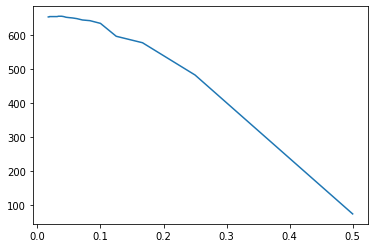

In [26]:
import matplotlib.pyplot as plt

plt.plot(d,num)

In [34]:
j = 0
num_b = []
d_b = []
for hi in range(1,40):
    h = 0.5/hi
    print("maxh",h)
    mesh = Mesh(unit_square.GenerateMesh(maxh=h))
    fes = H1(mesh, order=6,dirichlet=".*")
    gfu_b = GridFunction(fes,name = "u_b")
    ub = fes.TrialFunction()
    vb = fes.TestFunction()

    Ab = BilinearForm(fes)
    Fb = LinearForm(fes)

    Ab += grad(ub)*grad(vb)*dx

    Fb += vb*dx

    Ab.Assemble()
    Fb.Assemble()

    c = Preconditioner(Ab,"local",test = True)
    c.Update()
    data = []
    callback = lambda k,r: data.append((k,r))
    #gfu_a.vec.data = Aa.mat.Inverse(fes.FreeDofs()) * Fa.vec

    with TaskManager():
        CG (mat=Ab.mat, pre=c.mat, rhs=Fb.vec, sol=gfu_b.vec,printrates=False, maxsteps=10000,tol=1e-17,callback = callback)
    
    num_b.append(len(data))
    d_b.append(h)
    j = j + 1
Draw (mesh)
Draw(gfu_b)

maxh 0.5
maxh 0.25
maxh 0.16666666666666666
maxh 0.125
maxh 0.1
maxh 0.08333333333333333
maxh 0.07142857142857142
maxh 0.0625
maxh 0.05555555555555555
maxh 0.05
maxh 0.045454545454545456
maxh 0.041666666666666664
maxh 0.038461538461538464
maxh 0.03571428571428571
maxh 0.03333333333333333
maxh 0.03125
maxh 0.029411764705882353
maxh 0.027777777777777776
maxh 0.02631578947368421
maxh 0.025
maxh 0.023809523809523808
maxh 0.022727272727272728
maxh 0.021739130434782608
maxh 0.020833333333333332
maxh 0.02
maxh 0.019230769230769232
maxh 0.018518518518518517
maxh 0.017857142857142856
maxh 0.017241379310344827
maxh 0.016666666666666666
maxh 0.016129032258064516
maxh 0.015625
maxh 0.015151515151515152
maxh 0.014705882352941176
maxh 0.014285714285714285
maxh 0.013888888888888888
maxh 0.013513513513513514
maxh 0.013157894736842105
maxh 0.01282051282051282


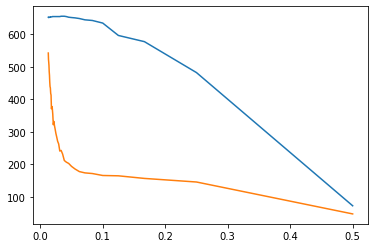

In [35]:
plt.plot(d_a,num_a)
plt.plot(d_b,num_b)

In [55]:
ref_b = []
for i in range(len(num_b)):
    ref_b.append(100+7.5/d_b[i])

In [56]:
ref_b

[115.0,
 130.0,
 145.0,
 160.0,
 175.0,
 190.0,
 205.0,
 220.0,
 235.0,
 250.0,
 265.0,
 280.0,
 295.0,
 310.0,
 325.0,
 340.0,
 355.0,
 370.0,
 385.0,
 400.0,
 415.0,
 430.0,
 445.0,
 460.0,
 475.0,
 490.0,
 505.0,
 520.0,
 535.0,
 550.0,
 565.0,
 580.0,
 595.0,
 610.0,
 625.0,
 640.0,
 655.0,
 670.0,
 685.0]

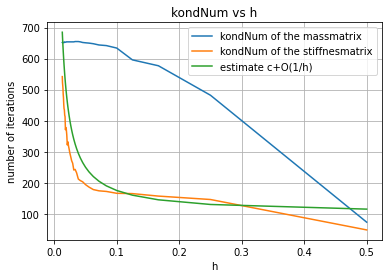

In [66]:
plt.title("kondNum vs h")
plt.grid()
plt.xlabel("h")
plt.ylabel("number of iterations")
plt.plot(d_a,num_a,label='kondNum of the massmatrix')
plt.plot(d_b,num_b,label='kondNum of the stiffnesmatrix')
plt.plot(d_b,ref_b,label='estimate c+O(1/h)')
plt.legend()